# Feature Selection

<div class="alert alert-block alert-info">

[1. The needed steps](#1st-bullet)<br>
- [1.1 Import the needed libraries](#2nd-bullet)<br>
- [1.2 Import the dataset](#3rd-bullet)<br>
- [1.3. Data pre-processing, data partition and scaling](#4th-bullet)<br>
    
[2. Feature Selection](#5th-bullet)<br>
- [2.1 Filter methods](#6th-bullet)<br>
    - [2.1.1 Univariate variables](#7th-bullet)<br>
    - [2.1.2 Correlation Indices](#8th-bullet)<br>
    - [2.1.3 Chi-Square](#9th-bullet)<br>
- [2.2 Wrapper Methods](#10th-bullet)<br>
    - [2.2.1 RFE](#11th-bullet)<br>
- [2.3 Embedded Methods](#12th-bullet)<br>
    - [2.3.1 Lasso](#13th-bullet)<br>
- [2.4 Final Insights](#14th-bullet)<br>
    
</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. The needed steps
    

    
</div>

<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

__`Step 1`__ Import the dataset __titanic.csv__ using the method `read_csv()` from pandas. Using the method `head()`, check the first 3 rows of the dataset.<br>
- _Documentation pandas.read_csv():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html <br>
- _Documentation pandas.DataFrame.head():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict survival on the Titanic

`Age` : passenger age in years <br>
`Cabin` : cabin number <br>
`Embarked` : Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton <br>
`Fare`: Passenger fare <br>
`Last Name` : Passenger last name <br>
`First Name` : Passenger first name <br>
`Parch`: # of parents / children aboard the Titanic <br>
`PassengerId`: Passenger unique identification <br>
`Pclass`: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
`Sex`: passenger gender <br>
`SibSp`: # of siblings / spouses aboard the Titanic <br>
`Ticket`: Ticket number <br>
`Title`: Passenger title <br>
`Family_Size`: Number of family members onboard <br>
`Embark_Hour`: Embark Hour (from 7:00 till 20:00)<br>
`Embarked_Flag`: Embark Flag: 0 = No, 1 = Yes<br>
`Water_Temp_celsius`: Water temperature at the time of the accident<br>
`Survived`: Survival (Dependent variable): 0 = No, 1 = Yes <br>

In [2]:
titanic = pd.read_csv('titanic.csv', sep = ';')
titanic.head(3)

,Age,Cabin,Embarked,Fare,Last Name,First Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Embark_hour,Embarked_Flag,Water_Temp_Celsius
0,22.0,NaN,S,7.2500,Braund,Mr. Owen Harris,0,1,3,male,1.0,0,A/5 21171,Mr,1.0,10,1,-2
1,38.0,C85,C,71.2833,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,2,1,female,1.0,1,PC 17599,Mrs,1.0,13,1,-2
2,26.0,NaN,S,7.9250,Heikkinen,Miss. Laina,0,3,3,female,0.0,1,STON/O2. 3101282,Miss,0.0,7,1,-2


<a class="anchor" id="4th-bullet">


### 1.3. Data pre-processing, data partition and scaling

</a>



__`Step 2`__ Define the variable `PassengerId` as the new index, using the method `set_index()` from pandas.
- _Documentation pandas.DataFrame.set_index():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [3]:
titanic.set_index('PassengerId', inplace = True)

In [5]:
titanic.head()

,Age,Cabin,Embarked,Fare,Last Name,First Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Embark_hour,Embarked_Flag,Water_Temp_Celsius
PassengerId,,,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,Braund,Mr. Owen Harris,0,3,male,1.0,0,A/5 21171,Mr,1.0,10,1,-2
2,38.0,C85,C,71.2833,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,1,female,1.0,1,PC 17599,Mrs,1.0,13,1,-2
3,26.0,NaN,S,7.9250,Heikkinen,Miss. Laina,0,3,female,0.0,1,STON/O2. 3101282,Miss,0.0,7,1,-2
4,35.0,C123,S,53.1000,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,1,female,1.0,1,113803,Mrs,1.0,19,1,-2
5,35.0,NaN,S,8.0500,Allen,Mr. William Henry,0,3,male,0.0,0,373450,Mr,0.0,12,1,-2


__`Step 3`__ Check if you have any missing values in the dataset. You can use the method `info()`from pandas.
- _Documentation pandas.DataFrame.info():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

In [20]:
# CODE HERE - Check the info of the dataset
titanic['Survived'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [13]:
#CODE HERE  use describe to obtain the most relevant descriptive statistics
titanic.describe(include ='all').T # .T gives the transpose

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,891.0,NaN,NaN,NaN,29.445196,13.244896,0.42,22.0,30.0,35.5,80.0
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,891,3,S,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Last Name,891,670,Andersson,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Name,823,745,Mr. James,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,891.0,NaN,NaN,NaN,0.501684,1.034651,0.0,0.0,0.0,1.0,6.0
Pclass,891.0,NaN,NaN,NaN,2.30303,0.959975,0.0,1.0,3.0,3.0,6.0
Sex,891,2,male,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,875.0,NaN,NaN,NaN,0.552,1.126132,0.0,0.0,0.0,1.0,8.0


In [10]:
# for categorical variables
titanic.describe(include = 'O')

,Cabin,Embarked,Last Name,First Name,Sex,Ticket,Title
count,204,891,891,823,891,826,891
unique,147,3,670,745,2,643,6
top,B96 B98,S,Andersson,Mr. James,male,CA. 2343,Mr
freq,4,645,9,7,578,7,525


It seems that the variable "Cabin" have only 204 values in the 891 rows - we need to solve this problem of missing values (in step 6).

__`Step 4`__ Define the independent variables as __X__ and the dependent variable ('Survived') as __y__. <br>
- _Documentation pandas.DataFrame.drop():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [16]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

__`Step 5`__ By using the method `train_test_split()` from sklearn.model_selection, split your dataset into train(70%) and validation(30%).<br>
- _Documentation sklearn.model_selection.train_test_split():_ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, # make the code reproducible
                                                  stratify = y, # maintain the proportion of target in train and test
                                                  shuffle = True)

__`Step 6`__ There are missing values in a couple of variables. Fill categories with 'Unknown' and the numericals with the average. <br>
- _Documentation pandas.DataFrame.fillna():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [21]:
#This is something you can do before the split
for column in ['Cabin', 'Ticket', 'First Name']:
    X_train[column] = X_train[column].fillna('Unknown')
    X_val[column] = X_val[column].fillna('Unknown')

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 224 to 81
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 623 non-null    float64
 1   Cabin               623 non-null    object 
 2   Embarked            623 non-null    object 
 3   Fare                623 non-null    float64
 4   Last Name           623 non-null    object 
 5   First Name          623 non-null    object 
 6   Parch               623 non-null    int64  
 7   Pclass              623 non-null    int64  
 8   Sex                 623 non-null    object 
 9   SibSp               612 non-null    float64
 10  Ticket              623 non-null    object 
 11  Title               623 non-null    object 
 12  Family_Size         616 non-null    float64
 13  Embark_hour         623 non-null    int64  
 14  Embarked_Flag       623 non-null    int64  
 15  Water_Temp_Celsius  623 non-null    int64  
dtypes: float64(4

**_Note_**: You should not use any information from the validation / test dataset to fill the missing values. 
Let's imagine that you have missing values on age and you want to fill those missing values with the median. You should compute the median value of age for the train dataset (suppose is 35) and fill the missing values in train, validation and test set (if available) with the median in the train dataset (35).

In [23]:
#filling with mean
for column in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        
        #store mean of training data in a variable - in a real application, you may need to store these values for future usages on e.g. test data 
        mean_to_fill = X_train[column].mean()
        
        #fill on X_train
        X_train[column].fillna(mean_to_fill, inplace=True)
        #Fill on X_val (with mean of training data, to avoid data linkage)
        X_val[column].fillna(mean_to_fill, inplace=True)

In [25]:
X_train.isna().sum()

Age                   0
Cabin                 0
Embarked              0
Fare                  0
Last Name             0
First Name            0
Parch                 0
Pclass                0
Sex                   0
SibSp                 0
Ticket                0
Title                 0
Family_Size           0
Embark_hour           0
Embarked_Flag         0
Water_Temp_Celsius    0
dtype: int64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 224 to 81
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 623 non-null    float64
 1   Cabin               623 non-null    object 
 2   Embarked            623 non-null    object 
 3   Fare                623 non-null    float64
 4   Last Name           623 non-null    object 
 5   First Name          623 non-null    object 
 6   Parch               623 non-null    int64  
 7   Pclass              623 non-null    int64  
 8   Sex                 623 non-null    object 
 9   SibSp               623 non-null    float64
 10  Ticket              623 non-null    object 
 11  Title               623 non-null    object 
 12  Family_Size         623 non-null    float64
 13  Embark_hour         623 non-null    int64  
 14  Embarked_Flag       623 non-null    int64  
 15  Water_Temp_Celsius  623 non-null    int64  
dtypes: float64(4

__`Step 6`__ Depending on the feature selection technique used, the input variables can differ - some techniques work only with numerical variables while others with categorical data. Define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables. Do the same for the validation data.
- _Documentation pandas.DataFrame.select_dtypes():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [28]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num.drop('Embarked_Flag', axis = 1, inplace = True)

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_train_cat['Embarked_Flag'] = X_train['Embarked_Flag']

# Repeat for Validation
#CODE HERE
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num.drop('Embarked_Flag', axis = 1, inplace = True)

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['Embarked_Flag'] = X_val['Embarked_Flag']

__`Step 7`__ Normalize the numerical data using the MinMaxScaler from sklearn. By default, this function applies the following formula:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}},$$

where:
- $X$ is the original feature vector,
- $X_{\\{min}}$ is the smallest value in that feature column, and
- $X_{\\{max}}$ is the largest value in that feature column.


As the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature. The function, however, allows you can set other maximum or minimum limits. You can check this (and other parameters in the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [29]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import MinMaxScaler

#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.37170143, 0.01541158, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       [0.01985423, 0.05445717, 0.33333333, ..., 0.5       , 0.6       ,
        0.        ],
       [0.23347575, 0.01541158, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       ...,
       [0.44709726, 0.07831878, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       [0.37170143, 0.04231498, 0.        , ..., 0.2       , 0.5       ,
        0.        ],
       [0.27117366, 0.01756683, 0.        , ..., 0.        , 0.75      ,
        0.        ]])

Convert the array into a pandas df

In [30]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Water_Temp_Celsius
PassengerId,,,,,,,,
224,0.371701,0.015412,0.000000,0.500000,0.000,0.0,0.35,0.0
643,0.019854,0.054457,0.333333,0.500000,0.375,0.5,0.60,0.0
647,0.233476,0.015412,0.000000,0.500000,0.000,0.0,0.35,0.0
32,0.440814,0.285990,0.000000,0.166667,0.125,0.1,0.75,0.0
602,0.371701,0.015412,0.000000,0.500000,0.000,0.0,0.50,0.0
...,...,...,...,...,...,...,...,...
716,0.233476,0.014932,1.000000,0.000000,0.250,0.6,0.00,0.0
492,0.258608,0.014151,0.000000,0.500000,0.000,0.0,0.55,0.0
584,0.447097,0.078319,0.000000,0.166667,0.000,0.0,0.35,0.0


__`Step 7B`__ Using the scaler, scale the numerical validation data also between 0 and 1.

**_Note_**: In the same way you did for filling the missing values, the scaling should **only consider** information gained from the training data. 
In that way, we are going to use the minimum and maximum values of the training dataset for each variable (the MinMaxScaler use those values to scale the data) to scale also the validation dataset.

In [31]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Water_Temp_Celsius
PassengerId,,,,,,,,
127,0.371701,0.015127,0.000000,0.500000,0.00,0.0,0.90,0.0
619,0.044986,0.076123,0.166667,0.333333,0.25,0.3,0.35,0.0
117,0.880623,0.015127,0.000000,0.500000,0.00,0.0,0.85,0.0


<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## 2. Feature Selection
    
</a>

Importance of Feature Selection:
- model performance
- computer resources
- 
    
</div>

<a class="anchor" id="6th-bullet">

## 2.1. Filter methods
    
</a>

<a class="anchor" id="7th-bullet">

### 2.1.1. Univariate variables
    
</a>

__`Step 8`__ Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.
- _Documentation pandas.DataFrame.var():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html

In [36]:
# CODE HERE
X_train_num_scaled.var()

Age                   0.027078
Fare                  0.011247
Parch                 0.029819
Pclass                0.025117
SibSp                 0.018036
Family_Size           0.022024
Embark_hour           0.051175
Water_Temp_Celsius    0.000000
dtype: float64

Water_Temp_Celsius is univariate. We can drop it in the train and in the validation dataset.

In [37]:
# CODE HERE
X_train_num_scaled.drop('Water_Temp_Celsius', axis = 1, inplace = True)
X_val_num_scaled.drop('Water_Temp_Celsius', axis = 1, inplace = True)
X_train_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour
PassengerId,,,,,,,
224,0.371701,0.015412,0.000000,0.5,0.000,0.0,0.35
643,0.019854,0.054457,0.333333,0.5,0.375,0.5,0.60
647,0.233476,0.015412,0.000000,0.5,0.000,0.0,0.35


<a class="anchor" id="8th-bullet">

### 2.1.2. Correlation indices
    
</a>

__`Step 9`__ We are going to check now the spearman correlation between the variables. 

The purpose of this step is two-fold:
1. Find irrelevant variables (exercise caution here - especially in classification problems)
2. Exclude redundant variables

Since we have a categorical target, measuring correlations against is ill-advised (we could however use other correlation indices for this such as **Point Bi-serial correlation** or **PhiK**). Thus we will limit ourselves to using the Spearman correlation between features.

__`Step 10`__ Create a function to plot the correlation between the variables named `cor_heatmap()` that should take as parameters the correlation table `cor`. Define the following conditions in the function:
- the size of the figure should be (12,10)
- create a heatmap using seaborn package where: 
    - `data` should be equal to the correlation table
    - `annot = True`
    - `cmap = plt.cm.Reds`
    - `fmt='.1'`

In [38]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

__`Step 11`__ Check the spearman correlation of the __X_train_num_scaled__ dataset by applying the method `corr()` and assign it to the object `cor_spearman`
- _Documentation pandas.DataFrame.corr():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [39]:
# CODE HERE
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour
Age,1.000000,0.130132,-0.222898,-0.300184,-0.168784,-0.198941,-0.053103
Fare,0.130132,1.000000,0.395551,-0.584189,0.444065,0.521315,0.017640
Parch,-0.222898,0.395551,1.000000,-0.168085,0.457278,0.783352,-0.041548
Pclass,-0.300184,-0.584189,-0.168085,1.000000,-0.092224,-0.145638,0.127731
SibSp,-0.168784,0.444065,0.457278,-0.092224,1.000000,0.816327,0.006646
Family_Size,-0.198941,0.521315,0.783352,-0.145638,0.816327,1.000000,0.003650
Embark_hour,-0.053103,0.017640,-0.041548,0.127731,0.006646,0.003650,1.000000


__`Step 12`__ Call the function `cor_heatmap()` to the correlation table `cor_spearman`

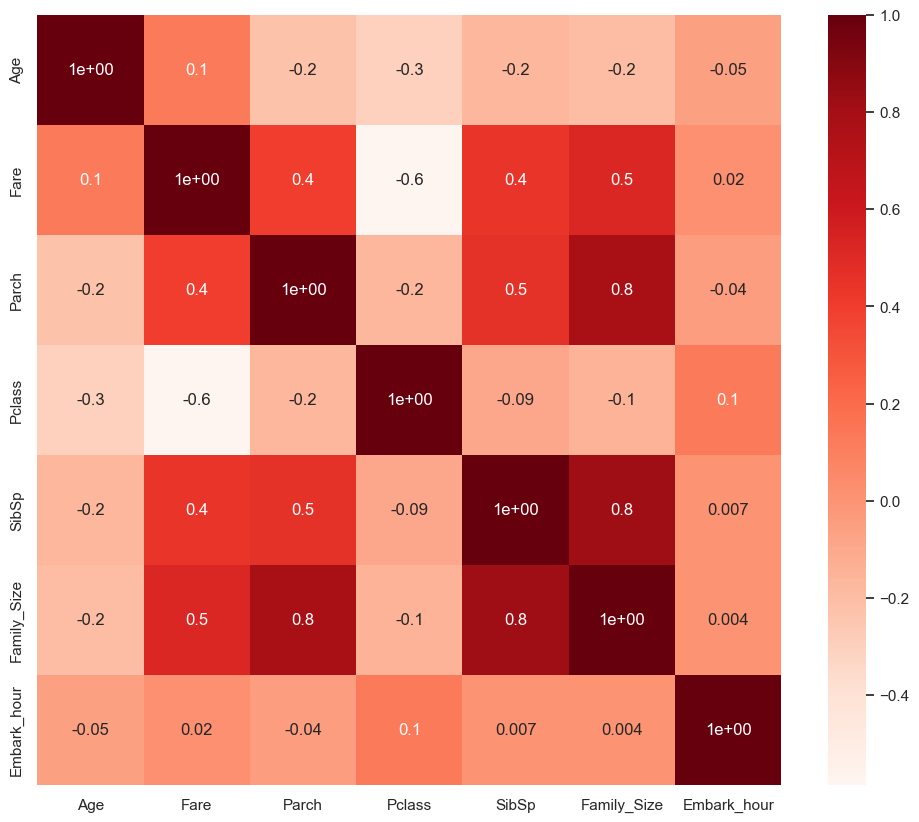

In [40]:
cor_heatmap(cor_spearman)

In this case, there's no point in calculating correlations with target, because the target is categorical (in a regression problem, it would make sense)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Parch vs Family_Size (0.8) <br>
    - SibSp vs Family_Size (0.8) <br>

We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the Family_Size since it is correlated with both variables, but maybe this can have a higher influence on the target).

<a class="anchor" id="9th-bullet">

### 2.1.3. Chi-Square for categorical data

</a>

This time we are going to check the importance of the categorical independent variables in the target. For that, we are going to use the dataset `X_train_cat`.

__`Step 13`__ Create a function named as `TestIndependence` that should receive as arguments the dataset of independent variables, the target, the name of each independent variable and the alpha defined. This function will follow the steps of chi-square to check if a independent variable is an important predictor.

In [41]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

__`Step 14`__ For all the categorical variables available on `X_train_cat`, call the function `TestIndependence`.

In [42]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Cabin is IMPORTANT for Prediction
Embarked is IMPORTANT for Prediction
Last Name is NOT an important predictor. (Discard Last Name from model)
First Name is NOT an important predictor. (Discard First Name from model)
Sex is IMPORTANT for Prediction
Ticket is NOT an important predictor. (Discard Ticket from model)
Title is IMPORTANT for Prediction
Embarked_Flag is NOT an important predictor. (Discard Embarked_Flag from model)


According to chi-square, we should discard `Last Name`, `First Name`, `Ticket` and `Embark_Flag`. 

<a class="anchor" id="10th-bullet">

### 2.1.4. Visualize the weight of the dependent variable in categorical data (EXTRA)

</a>

In this step, we are going to create two plots to check the weight that the dependent variable has in the different labels of a categorical variable. <br><br>
The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the depedent variable in each category. <br><br>
Sometimes it can be useful not only to use more advanced techniques like the ones we saw previously, but also to explore visually the variables that we have, like we are going to do in this step.

While in the example given you can visualize this relation only to categorical data, you can create your own function where numerical data is split into bins to have a similar visualization.


__`Step 15`__ Create a function where you can visualize the proportion of the presence of each label of the dependent variable in each possible value of a categorical feature. Check the "weight" of the variable `Sex`.

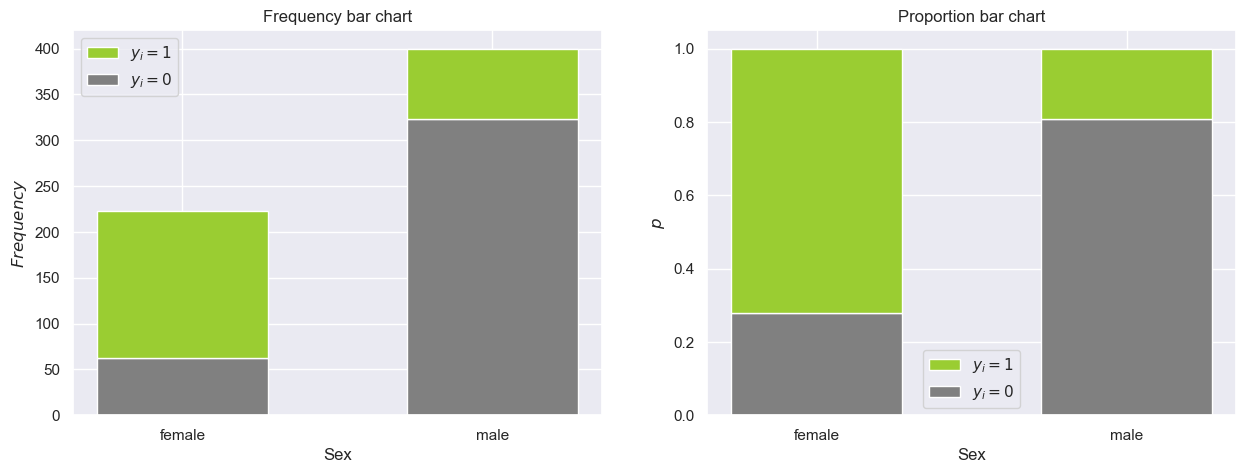

In [43]:
# first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Sex", "Survived")

<a class="anchor" id="11th-bullet">

## 2.2. Wrapper Methods
    
</a>

<a class="anchor" id="12th-bullet">

### 2.2.1. RFE
    
</a>

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. RFE uses a predictive model to run multiple times, always removing the "least important" variable before running again. The model used is what we call the *base estimator*. 

**RFE accepts as base estimator any predictive model that has a way of determining feature importance**. In the case for this example, the base estimator we will use is a Logistic Regression, which uses coefficients as the way to determine the importance of different variables.


__`Step 16`__ Using LogisticRegression, create a Logistic Regression Classifier instance called `model`
- _Documentation sklearn.linear_model.LogisticRegression():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [44]:
model = LogisticRegression()

__`Step 17`__ Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_to_select` = 3 <br> <br>

- _Documentation sklearn.feature_selection.RFE():_ https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [45]:
# CODE HERE
rfe = RFE(estimator = model, n_features_to_select = 3) # in reality, we should try for different number of variables (for now, assume we only want 3)

__`Step 18`__ Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_rfe`

In [47]:
# CODE HERE
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

__`Step 20`__ Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [48]:
# CODE HERE
X_train_num_scaled.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size',
       'Embark_hour'],
      dtype='object')

In [49]:
# CODE HERE
rfe.support_

array([ True,  True, False,  True, False, False, False])

__`Step 21`__ Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.

In [50]:
# CODE HERE
rfe.ranking_

array([1, 1, 5, 1, 3, 4, 2])

__Step 22:__ Create an object (pandas Series) named `selected_features` that will have as index the `X_train_num` columns names and the `support_` attribute as value. <br>
- _Documentation pandas.Series():_ https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [51]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age             True
Fare            True
Parch          False
Pclass          True
SibSp          False
Family_Size    False
Embark_hour    False
dtype: bool

If you don't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 7 variables.

In [52]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.697761


According to RFE using Logistic Regression, the best number of numerical features to use for this data is **3** and we know, from before, that the numerical variables that we should keep for the final model are `Age`, `Fare` and `PClass`.

Run the cell below to plot how training accuracy and validation accuracy vary with the number of features.

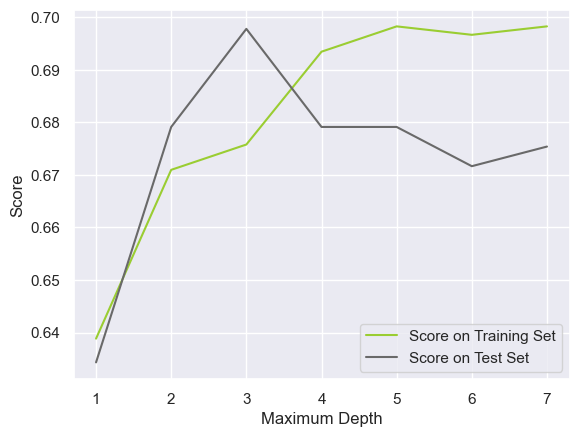

In [32]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

we shouldn't expect the test score to be higher than training score

**Now, try to perform RFE with a different classifier** and see if there are differences in the variables that are selected.

For that, we are going to use the function **RFE** with a base estimator being a **Support Vector Classifier**. What is the optimal number of features and how can we know what they are?

In [53]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

Optimum number of features: 5
Score with 5 features: 0.671642
Features to select: 
Age             True
Fare            True
Parch          False
Pclass          True
SibSp           True
Family_Size    False
Embark_hour     True
dtype: bool


According to RFE with a Support Vector Machines, the most important variables are `Age`, `Fare`, `Pclass`, `SibSp` and `Embark_hour`.

You can also plot the results. 

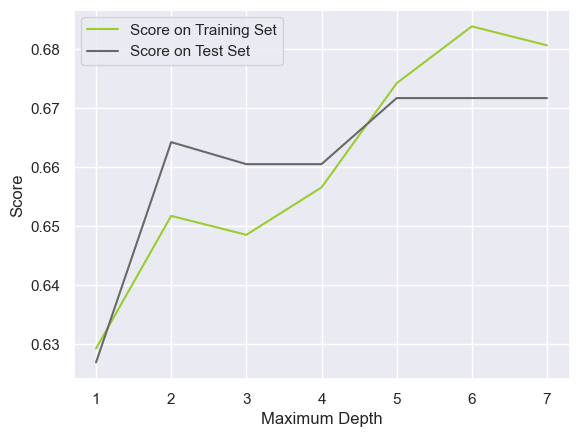

In [54]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

**Note:** Sklearn also features another implementation of **RFE** which is **RFECV**. 

This implementation uses cross-validation during model training AND automatically finds the optimal number of features for you.

<a class="anchor" id="13th-bullet">

## 2.3. Embedded Methods
    
</a>

<a class="anchor" id="14th-bullet">

### 2.3.1. Lasso Regression
    
</a>

__Step 23:__ Create a function to plot the importance of the features named `plot_importance()` that should receive as parameters the "importance" of each variable (`coef`) and a `name` to define the title.  Define the following conditions/steps in the function:
- sort the values of `coef` asn assign it to the object `imp_coef`
- the size of the figure should be (8,10)
- create a matplotlib plot `kind = barh` to plot the `imp_coef`.
- Define the title as "Feature importance using" + _the name of the model_ `name` + " Model"

In [55]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

__Step 24:__ Using LassoCV, create a Lasso Regression instance called `reg`
- _Documentation sklearn.feature_selection.LassoCV():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [56]:
# CODE HERE
reg = LassoCV() # we could change the "eps" parameter

__Step 25:__ Fit the data to `reg` by using the method `fit()` where `X` should be assigned to `data` and `y` to the dependent variable.

In [57]:
# CODE HERE
reg.fit(X_train_num_scaled, y_train)

LassoCV()

__Step 26:__ Create an object (pandas Series) named `coef` that will have as index the `data` columns names and the `coef_` attribute as value.

In [58]:
# CODE HERE
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

Age           -0.532898
Fare           0.736138
Parch         -0.257195
Pclass        -0.789676
SibSp         -0.742005
Family_Size    0.573198
Embark_hour    0.254992
dtype: float64

__Step 27:__ Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).

In [59]:
# CODE HERE
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 0 variables


__Step 28:__ Sort the values of `coef` using the method `sort_values()`.

In [60]:
# CODE HERE
coef.sort_values()

Pclass        -0.789676
SibSp         -0.742005
Age           -0.532898
Parch         -0.257195
Embark_hour    0.254992
Family_Size    0.573198
Fare           0.736138
dtype: float64

__Step 29:__ By calling the function `plot_importance()` that we created on step 15, plot the feature importance of the variables, by passing as parameters the object `coef` and the name `"Lasso"`

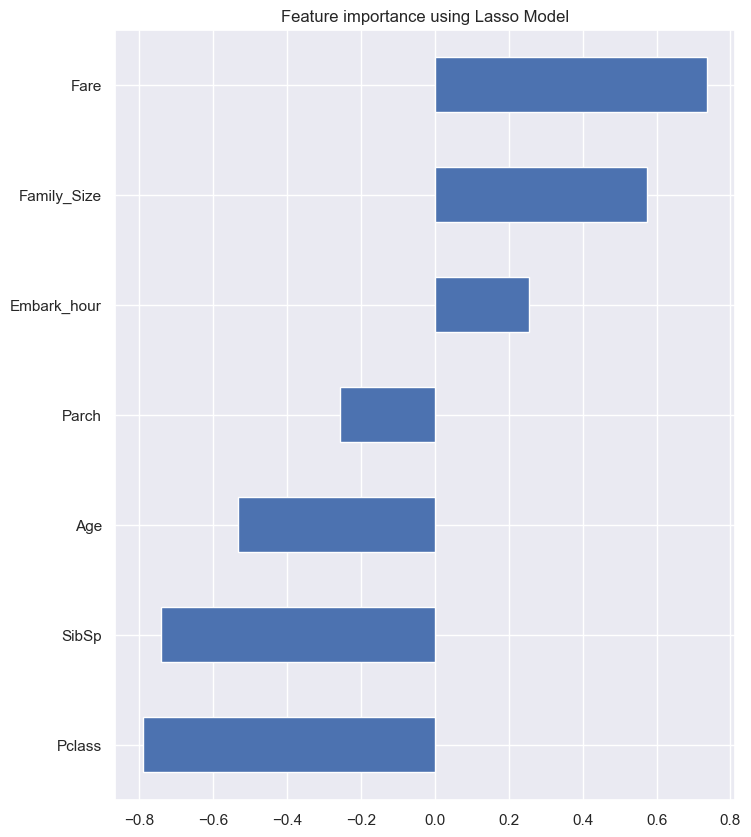

In [61]:
# CODE HERE
plot_importance(coef,'Lasso')

According to Lasso, we should not remove any variable as no variable seems insignificant (`coefficient == 0`). `Parch` and `Embark_hour` seem less important than their remaining predictors, but still contribute. 

<a class="anchor" id="15th-bullet">

## Final Insights:

</a>

We can use a majority mode to select the features (if we have 5 approaches, we need at least 3 of them indicating to select a feature)

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |---|
| Age | Keep | Keep | Keep |Keep | Include in the model |
| Fare | Keep | Keep | Keep |Keep| Include in the model |
| Parch | Keep?| Discard | Discard |Keep ?| Discard |
| PClass | Keep | Keep | Keep | Keep | Include in the model |
| SibSp | Keep? | Discard | Keep | Keep | Keep |
| Family_Size | Keep? | Discard | Discard | Keep | Discard |
| Embark_Hour | Keep |Discard |Keep | Keep? |  Try with and without |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| First Name| Discard|
| Last Name| Discard|
| Sex | Keep | 
| Ticket | Discard | 
| Title | Keep |
| Embarked Flag | Discard | 

<hr>

